In [ ]:
# Business Question:  What fields are correlated with 'gross revenue'?

In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,6)  #Adjusts configuration of the created plots

In [2]:
# Read in the data

df = pd.read_csv('/Users/danielerben/Desktop/movies.csv')

In [3]:
# View data

df.head(30)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [ ]:
                                #CLEAN AND ORGANIZE DATA

In [11]:
# Check for missing values in each column as a percentage of total rows.

for col in df.columns:
    pct_missing = round(np.mean(df[col].isnull()),3)   #Rounding for legibility
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.01%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.283%
gross - 0.025%
company - 0.002%
runtime - 0.001%


In [61]:
#Clean data set by removing all rows with null values.
df = df.dropna()

In [13]:
# Check again to verify null values were removed.

for col in df.columns:
    pct_missing = round(np.mean(df[col].isnull()),3)
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [35]:
# Check data types for each column
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [62]:
#Clean up redundant decimals in select columns by changing data type to integer.

df['votes'] = df['votes'].astype('int64')

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['runtime'] = df['runtime'].astype('int64')

In [16]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [63]:
#'Year' and 'released' columns contain conflicting information.
#Create a new 'year_correct' column by extracting the year out of the 'released' column.

df['year_correct'] = df['released'].str.split('[(,\s)]').str[3]
df['year_correct'].head(20)

0     1980
1     1980
2     1980
3     1980
4     1980
5     1980
6     1980
7     1980
8     1981
9     1980
10    1980
11    1984
12    1980
13    1980
14    1980
15    1980
17    1980
18    1980
20    1980
21    1981
Name: year_correct, dtype: object

In [64]:
#Delete the old 'year' & 'released' columns for clarity.

del df['year']
del df['released']

In [38]:
#Checking results

df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [5]:
#View every row in the dataframe.

pd.set_option('display.max_row',None)

In [52]:
#Sort rows by 'gross' revenue descending.

df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [24]:
#Check for duplicate rows
len(df[df.duplicated()])

0

In [23]:
                                #VISUAL ANALYSIS

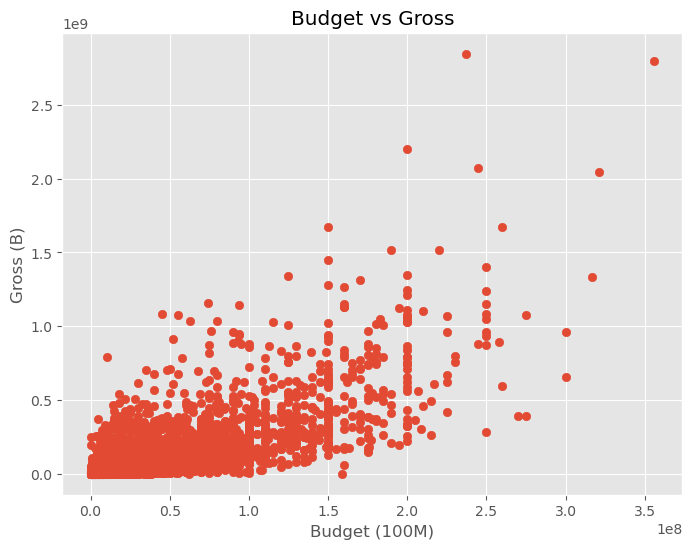

In [80]:
#Scatter plot with 'budget' vs 'gross'

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross')
plt.xlabel('Budget (100M)')
plt.ylabel('Gross (B)')

plt.show()

In [9]:
df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


Text(0, 0.5, 'Gross (B)')

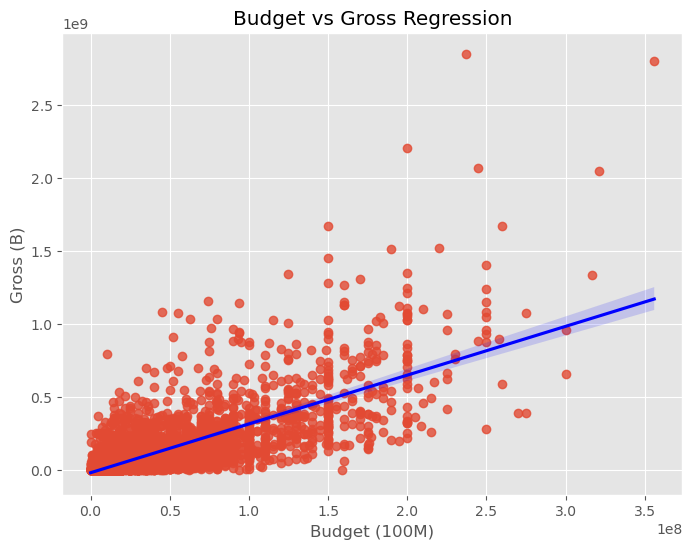

In [82]:
#Create a 'budget' vs 'gross' regression plot in seaborn

reg = sns.regplot(x='budget', y='gross', data=df, line_kws={'color':'blue'})

reg.set(title='Budget vs Gross Regression')
reg.set_xlabel('Budget (100M)')
reg.set_ylabel('Gross (B)')

In [ ]:
#Findings:  Larger 'budget' results in higher 'gross' revenue

In [83]:
#Looking at correlation of numerical fields

df.corr()

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


In [ ]:
#Findings:  High correlation between 'budget' & 'gross'

Text(0.5, 1.0, 'Correlation for Numerical Fields')

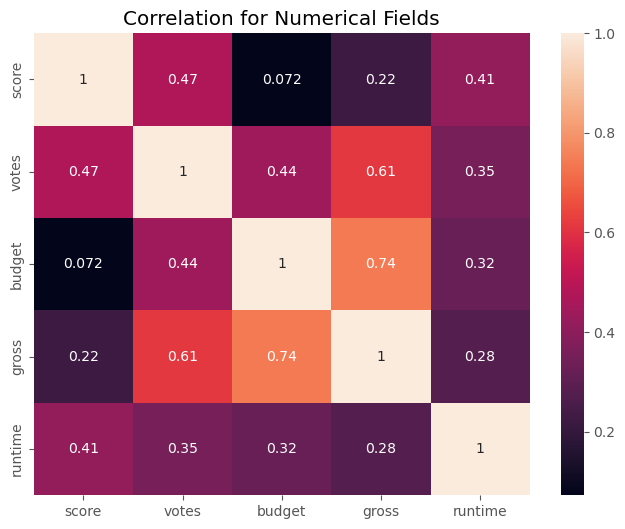

In [84]:
#Create heatmap for the correlation matrix
#Color allows us to see the correlation more easily

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation for Numerical Fields')

In [40]:
# Check column data types
df.dtypes

name         object
rating       object
genre        object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [53]:
#To find correlations for non-numerical 'object' fields, we must numerize them
#Convert 'object' fields to 'category', then numerize with .cat.codes

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [42]:
#Verify data type conversion

df_numerized.dtypes

name          int16
rating         int8
genre          int8
score       float64
votes         int64
director      int16
writer        int16
star          int16
country        int8
budget        int64
gross         int64
company       int16
runtime       int64
dtype: object

In [54]:
df_numerized.head(20)

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,386,5,0,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,30
7445,388,5,0,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,40
3045,4909,5,6,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,18
6663,3643,5,0,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,36
7244,389,5,0,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,39
7480,4388,4,2,6.9,222000,1012,1361,457,47,260000000,1670727580,1423,118,40
6653,2117,5,0,7.0,593000,335,2523,293,47,150000000,1670516444,1397,124,36
6043,3878,5,0,8.0,1300000,1060,1646,1470,47,220000000,1518815515,983,143,33
6646,1541,5,0,7.1,370000,809,481,1785,47,190000000,1515341399,1397,137,36
7494,1530,4,2,6.8,148000,277,1383,1036,47,150000000,1450026933,1422,103,40


In [65]:
#Comparing to the original non-numerized format
#Each non-numerical field now has a corresponding number id
df.head(20)

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
5,Friday the 13th,R,Horror,6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95,1980
6,The Blues Brothers,R,Action,7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133,1980
7,Raging Bull,R,Biography,8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129,1980
8,Superman II,PG,Action,6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127,1981
9,The Long Riders,R,Biography,7.0,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100,1980


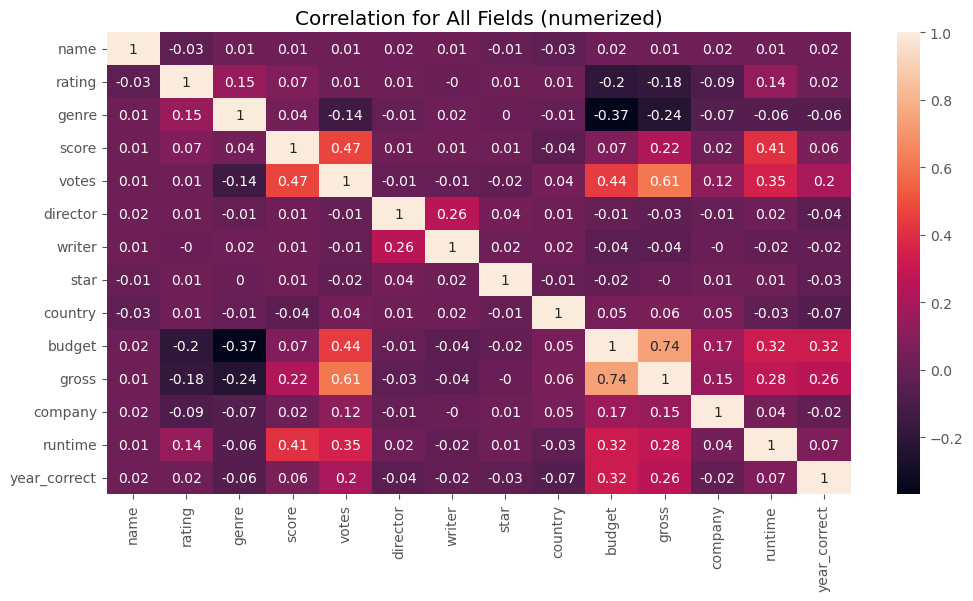

In [55]:
#Create heatmap for the correlation matrix based on all fields numerized
#Allows us to see correlations for data that was previously non-numerical

correlation_matrix = round(df_numerized.corr(),2)   #Rounding for legibility
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation for All Fields (numerized)')
matplotlib.rcParams['figure.figsize'] = (12,6)

In [47]:
#Findings: 'votes' have a positive effect on 'gross' revenue

In [56]:
#Same info, but without the heatmap
round(df_numerized.corr(),2)

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.00,-0.03,0.01,0.01,0.01,0.02,0.01,-0.01,-0.03,0.02,0.01,0.02,0.01,0.02
rating,-0.03,1.00,0.15,0.07,0.01,0.01,-0.00,0.01,0.01,-0.20,-0.18,-0.09,0.14,0.02
genre,0.01,0.15,1.00,0.04,-0.14,-0.01,0.02,0.00,-0.01,-0.37,-0.24,-0.07,-0.06,-0.06
score,0.01,0.07,0.04,1.00,0.47,0.01,0.01,0.01,-0.04,0.07,0.22,0.02,0.41,0.06
votes,0.01,0.01,-0.14,0.47,1.00,-0.01,-0.01,-0.02,0.04,0.44,0.61,0.12,0.35,0.20
director,0.02,0.01,-0.01,0.01,-0.01,1.00,0.26,0.04,0.01,-0.01,-0.03,-0.01,0.02,-0.04
writer,0.01,-0.00,0.02,0.01,-0.01,0.26,1.00,0.02,0.02,-0.04,-0.04,-0.00,-0.02,-0.02
star,-0.01,0.01,0.00,0.01,-0.02,0.04,0.02,1.00,-0.01,-0.02,-0.00,0.01,0.01,-0.03
country,-0.03,0.01,-0.01,-0.04,0.04,0.01,0.02,-0.01,1.00,0.05,0.06,0.05,-0.03,-0.07
budget,0.02,-0.20,-0.37,0.07,0.44,-0.01,-0.04,-0.02,0.05,1.00,0.74,0.17,0.32,0.32


In [57]:
#Using the 'unstack' method.  Allows for a categorical view of the same info.
correlation_matrix = round(df_numerized.corr(),2)  #Rounding for legibility
cor_pairs = correlation_matrix.unstack()
cor_pairs

name          name            1.00
              rating         -0.03
              genre           0.01
              score           0.01
              votes           0.01
              director        0.02
              writer          0.01
              star           -0.01
              country        -0.03
              budget          0.02
              gross           0.01
              company         0.02
              runtime         0.01
              year_correct    0.02
rating        name           -0.03
              rating          1.00
              genre           0.15
              score           0.07
              votes           0.01
              director        0.01
              writer         -0.00
              star            0.01
              country         0.01
              budget         -0.20
              gross          -0.18
              company        -0.09
              runtime         0.14
              year_correct    0.02
genre         name  

In [58]:
#Sorting by correlation amount(low to high) using side by side category pairs
sorted_cor_pairs = cor_pairs.sort_values()
sorted_cor_pairs

budget        genre          -0.37
genre         budget         -0.37
gross         genre          -0.24
genre         gross          -0.24
budget        rating         -0.20
rating        budget         -0.20
              gross          -0.18
gross         rating         -0.18
genre         votes          -0.14
votes         genre          -0.14
company       rating         -0.09
rating        company        -0.09
company       genre          -0.07
genre         company        -0.07
year_correct  country        -0.07
country       year_correct   -0.07
runtime       genre          -0.06
genre         runtime        -0.06
              year_correct   -0.06
year_correct  genre          -0.06
writer        budget         -0.04
score         country        -0.04
writer        gross          -0.04
director      year_correct   -0.04
budget        writer         -0.04
year_correct  director       -0.04
gross         writer         -0.04
country       score          -0.04
director      gross 

In [59]:
#Filter to show only categories with corrrelation greater than 50%
high_correlation = sorted_cor_pairs[sorted_cor_pairs > .5]
high_correlation

votes         gross           0.61
gross         votes           0.61
              budget          0.74
budget        gross           0.74
name          name            1.00
company       company         1.00
gross         gross           1.00
budget        budget          1.00
country       country         1.00
star          star            1.00
writer        writer          1.00
director      director        1.00
votes         votes           1.00
score         score           1.00
genre         genre           1.00
rating        rating          1.00
runtime       runtime         1.00
year_correct  year_correct    1.00
dtype: float64

In [ ]:
#Findings:  'budget' has the highest correlation to 'gross' revenue, followed by 'votes'